In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.shape

(5000, 3)

In [4]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [5]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [6]:
## EDA

df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [8]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


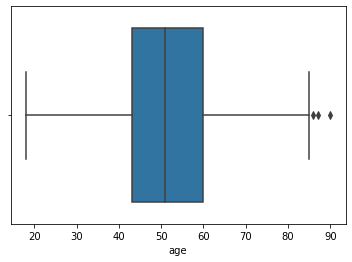

In [9]:
sns.boxplot(df['age'])
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


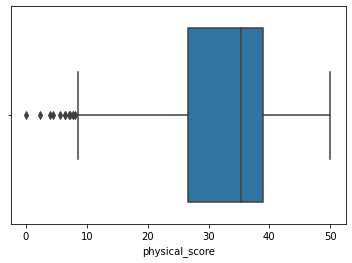

In [10]:
sns.boxplot(df['physical_score'])
plt.show()

In [11]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


### Removing outliers from "AGE" & "PHYSICAL_SCORE" 

In [12]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age'])
df_1 = win.fit_transform(df[['age']])
print(win.left_tail_caps_, win.right_tail_caps_)


{'age': 17.5} {'age': 85.5}


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


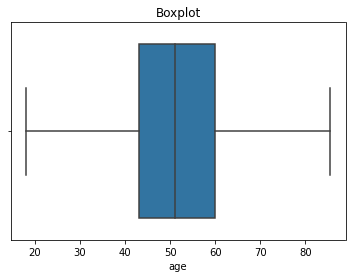

In [13]:
sns.boxplot(df_1.age)
plt.title('Boxplot')
plt.show()

In [14]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['physical_score'])
df_2 = win.fit_transform(df[['physical_score']])
print(win.left_tail_caps_, win.right_tail_caps_)


{'physical_score': 8.399999999999999} {'physical_score': 57.20000000000001}


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


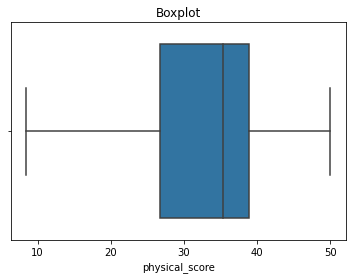

In [15]:
sns.boxplot(df_2.physical_score)
plt.title('Boxplot')
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


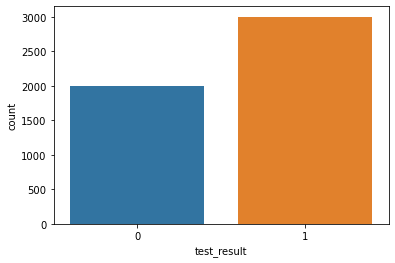

In [16]:
sns.countplot(df["test_result"])
plt.show()

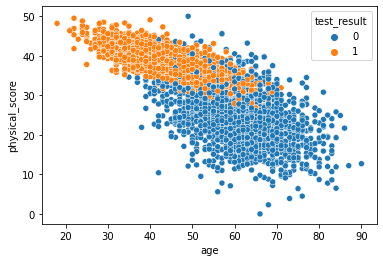

In [17]:
sns.scatterplot(x="age", y="physical_score", hue="test_result", data=df)
plt.show()

### Splitting X & Y 

In [18]:
x = df.iloc[:,[0,1]]
x

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [19]:
y = df.iloc[:,2]
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


In [21]:
x_train

,age,physical_score
1279,50.0,32.8
4047,61.0,16.9
524,74.0,19.1
4266,44.0,36.9
2696,46.0,32.4
...,...,...
1630,65.0,20.3
4616,45.0,41.6
3414,41.0,41.9
220,48.0,35.6


In [22]:
y_train

1279    0
4047    0
524     0
4266    1
2696    0
       ..
1630    0
4616    1
3414    1
220     1
3617    1
Name: test_result, Length: 3500, dtype: int64

In [23]:
x_test

,age,physical_score
1428,73.0,30.2
167,66.0,24.0
734,52.0,35.9
2411,44.0,40.4
2777,52.0,27.6
...,...,...
2936,39.0,38.5
724,52.0,32.5
2747,49.0,41.0
3084,62.0,17.4


In [24]:
y_test

1428    0
167     0
734     1
2411    1
2777    0
       ..
2936    1
724     1
2747    1
3084    0
813     0
Name: test_result, Length: 1500, dtype: int64

### Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

### Logistic Regression Model 

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(scaled_x_train, y_train)

LogisticRegression()

In [27]:
lr.coef_

array([[-0.77887665,  3.66680979]])

In [28]:
lr.intercept_

array([0.45141496])

### Prediction & Evaluation

In [29]:
y_pred = lr.predict(scaled_x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, x, y, cv=5)
print(score)
score.mean()

[0.933 0.915 0.908 0.91  0.914]


0.916

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(y_test, y_pred)

0.912

In [32]:
confusion_matrix(y_test, y_pred)

array([[524,  78],
       [ 54, 844]], dtype=int64)

In [33]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.87      0.89       602\n           1       0.92      0.94      0.93       898\n\n    accuracy                           0.91      1500\n   macro avg       0.91      0.91      0.91      1500\nweighted avg       0.91      0.91      0.91      1500\n'

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


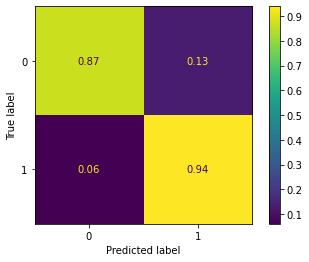

In [34]:
plot_confusion_matrix(lr, scaled_x_test, y_test, normalize='true')

### Save the Model in a file 

In [36]:
import pickle
filename = "lr.pkl"
pickle.dump(lr, open(filename, 'wb'))